# 解の追跡の例

In [1]:
import numpy as np
import pathfollowing as pf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set('poster', 'whitegrid', 'dark', rc={"lines.linewidth": 2, 'grid.linestyle': '-'})

## foldの場合

$$f(x, a) = a - x^2 = 0$$

In [2]:
def func(x, a):
    return np.array([a[0] - x[0]**2])

def dfdx(x, a):
    return np.array([[-2*x[0]]])

def dfda(x,a):
    return np.array([1.0])

In [3]:
x=np.array([1.0])
a=np.array([1.0])
bd,bp,lp=pf.pathfollow(x, a, func, dfdx, dfda,nmax=200, h=-0.05, epsr=1.0e-10, epsb=1.0e-10, quiet=True)

Limit Pointが一つある

In [4]:
bd[lp[0]]

{'TY': 'L',
 'x': array([0.]),
 'a': array([0.]),
 'v': array([ 0.99906615, -0.04320669])}

In [5]:
bd_r = np.array([pt['a'][0] for pt in bd])
bd_x = np.array([pt['x'][0] for pt in bd])

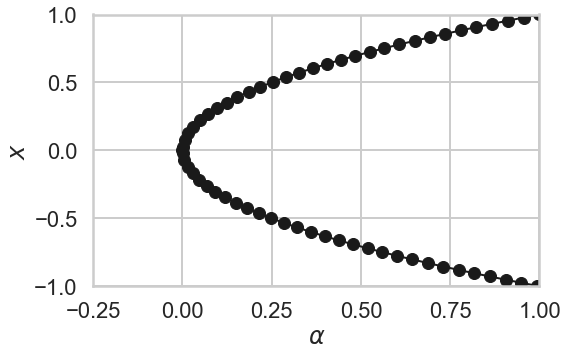

In [6]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ax.set_xlim(-0.25,1.0)
ax.set_ylim(-1, 1)
ax.set_xlabel(r"$\alpha$")
ax.set_ylabel("$x$")
ax.plot(bd_r, bd_x, 'o-k')
# plt.savefig("bd_ex1.pdf", bbox_inches='tight')

## 複数個のfold

$$
f(x, a) = a + \frac{x^2}{2} - x^4 = 0
$$

In [7]:
def func(x, a):
    return np.array([a[0] + x[0]**2/2 - x[0]**4])

def dfdx(x, a):
    return np.array([[x[0]-4*x[0]**3]])

def dfda(x,a):
    return np.array([1.0])

In [8]:
x=np.array([1.0])
a=np.array([0.5])
bd,bp,lp=pf.pathfollow(x, a, func, dfdx, dfda,nmax=200, h=-0.05, epsr=1.0e-10, epsb=1.0e-10, quiet=True)

Limit Pointが三つある

In [9]:
for i in lp:
    print(bd[i])

{'TY': 'L', 'x': array([0.5]), 'a': array([-0.0625]), 'v': array([ 0.99719905, -0.0747934 ])}
{'TY': 'L', 'x': array([4.13590306e-25]), 'a': array([2.91339629e-19]), 'v': array([0.9992765 , 0.03803267])}
{'TY': 'L', 'x': array([-0.5]), 'a': array([-0.0625]), 'v': array([ 0.99723956, -0.07425134])}


In [10]:
bd_r = np.array([pt['a'][0] for pt in bd])
bd_x = np.array([pt['x'][0] for pt in bd])

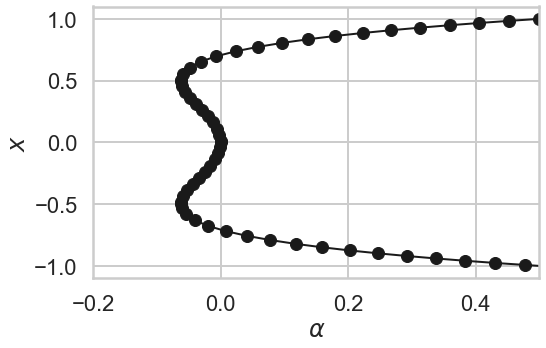

In [11]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ax.set_xlim(-0.2,0.5)
ax.set_ylim(-1.1, 1.1)
ax.set_xlabel(r"$\alpha$")
ax.set_ylabel("$x$")
ax.plot(bd_r, bd_x, 'o-k')
# plt.savefig("bd_ex2.pdf", bbox_inches='tight')

## Branch Pointを飛び越える

$$
    f(x, a) = a x - x^3 = 0
$$
- 全ての$a$に対して$x = 0$は解である．
- 分岐点$(x, a) = (0, 0)$では陰関数定理が成り立たないが，飛び越えて追跡できている

In [12]:
def func(x, a):
    return np.array([a[0] * x[0] - x[0]**3])

def dfdx(x, a):
    return np.array([[a[0]-3*x[0]**2]])

def dfda(x,a):
    return np.array([[x[0]]])

In [13]:
x=np.array([1.0])
a=np.array([1.0])
bd,bp,lp=pf.pathfollow(x, a, func, dfdx, dfda,nmax=200, h=-0.05, epsr=1.0e-10, epsb=1.0e-10, quiet=True)
# bd=pf.pathfollow00(x, a, func, dfdx, dfda,nmax=200, h=-0.05, epsr=1.0e-10, epsb=1.0e-10)

分岐点を検出している

In [14]:
for i in bp:
    print(bd[i])

{'TY': 'B', 'x': array([0.]), 'a': array([-7.94503352e-16]), 'v': array([0.99872632, 0.00678865]), 'phi': array([1., 0.])}


In [15]:
bd_r = np.array([pt['a'][0] for pt in bd])
bd_x = np.array([pt['x'][0] for pt in bd])

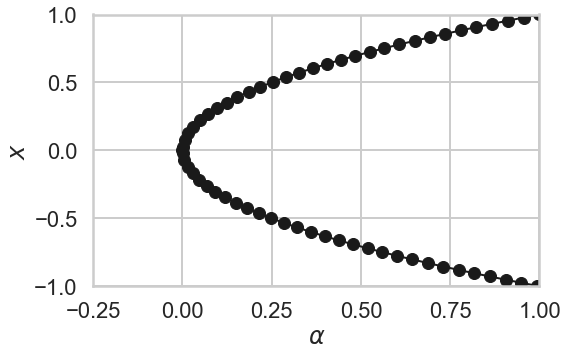

In [16]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ax.set_xlim(-0.25,1.0)
ax.set_ylim(-1., 1.)
ax.set_xlabel(r"$\alpha$")
ax.set_ylabel("$x$")
ax.plot(bd_r, bd_x, 'o-k')
# plt.savefig("bd_ex3.pdf", bbox_inches='tight')